In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))

In [2]:
import numpy as np
import scipy as sp
import ImagePixelExtractor
from Pixel import Pixel

### Récupération des données

In [3]:
max_x = 512
max_y = 512

In [4]:
images = ImagePixelExtractor.get_full_image_array("../chest_Xray/test/PNEUMONIA/", max_x, max_y)

Loading all images from directory: ../chest_Xray/test/PNEUMONIA/


In [5]:
print("Image shape:", images.shape)

Image shape: (512, 512, 390)


In [6]:
Pixel.shapiro_wilk_test(images[0, 0])

ShapiroResult(statistic=np.float64(0.8455661321833262), pvalue=np.float64(4.0621252252314655e-19))

In [7]:
image_to_generate = np.array([[Pixel(x, y, images[x, y]) for y in range(max_y)] for x in range(max_x)])

In [8]:
image_to_generate.shape

(512, 512)

## Génération d'une image

In [9]:
generated_image = np.array([p.generate_pixel_value() for p in image_to_generate.flatten()]).reshape(max_x, max_y)

In [10]:
generated_image.shape

(512, 512)

In [11]:
import matplotlib.pyplot as plt

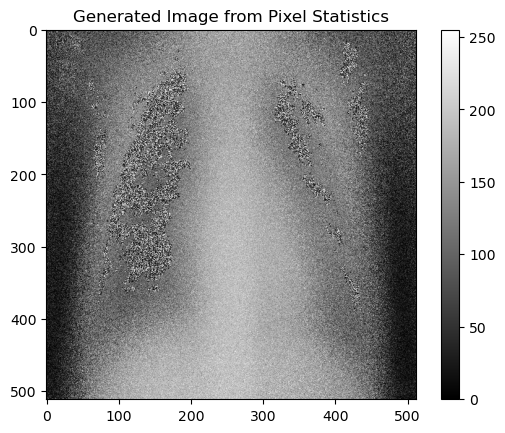

In [12]:
plt.imshow(generated_image, cmap='gray')
plt.colorbar()
plt.title('Generated Image from Pixel Statistics')
plt.show()